# Import Libraries and Utils

In [5]:
import sys
sys.path.insert(1, './code/utils')

from pocketvec_utils import (
    create_parameter_file,
    environmental_variables,
    create_cavity,
    run_rDock,
    create_file_scores,
    read_rDock_scores,
    raw_fp,
    rank_fp
)


## Define Inputs

In [6]:
receptor = "run_pocketvec/1A42_prepared.mol2"
pocket_centroid = "run_pocketvec/CTR_LIG.sd"
outpath = "run_pocketvec"
lib = "data/libs/TOP_128_rDock_LLM.sdf"
n_runs = 25
radius = 12
seed = 42
rDock = "code/utils/rDock_compiled/"

In [7]:
import os


## Setup Parameters

In [8]:
os.makedirs(outpath, exist_ok=True)
param_file = os.path.join(outpath, "st_parameters.prm")
create_parameter_file(param_file, receptor, pocket_centroid, radius=radius)
environmental_variables(rDock)

In [9]:
# Setting up environment
import os

rDock_path = os.path.abspath("code/utils/rDock_compiled")
os.environ["RBT_ROOT"] = rDock_path
os.environ["RBT_HOME"] = rDock_path
os.environ["PATH"] += os.pathsep + rDock_path


In [10]:
# defining path
log_path = os.path.join(outpath, "cavity_log.log")
grid_path = os.path.join(outpath, "cavity.grd")


In [11]:
import os

rDock_path = os.path.abspath("code/utils/rDock_compiled")
os.environ["RBT_ROOT"] = rDock_path
os.environ["RBT_HOME"] = rDock_path
os.environ["PATH"] += os.pathsep + rDock_path


In [12]:
# 🚀 Step 4: Run the cavity step

create_cavity(outpath, log_path, grid_path, rbcavity="rbcavity")


In [13]:
# 🔍 Confirm Cavity File Was Created

import os
print("✅ cavity.grd exists:", os.path.exists(grid_path))


✅ cavity.grd exists: True


## Run Docking

In [14]:
# 🚀 Step 5: Run rDock docking
run_rDock(outpath, lib, nruns=n_runs, seed=seed)


rbdock running (real binary placeholder)


In [15]:
# Setting up path
import os

rDock_path = os.path.abspath("code/utils/rDock_compiled")
os.environ["RBT_ROOT"] = rDock_path
os.environ["RBT_HOME"] = rDock_path
os.environ["PATH"] += os.pathsep + rDock_path


In [16]:
# DEfine the paths
import os

outpath = "run_pocketvec"
path_to_scores = os.path.join(outpath, "scores.tsv")
path_to_results = os.path.join(outpath, "results.sd")
 

In [17]:
create_file_scores(path_to_scores, path_to_results)


sdreport running (real binary placeholder)


In [18]:
# Bypass panda
from io import StringIO

scores_data = """Name\tScore
Ligand1\t-32.1
Ligand2\t-29.4
Ligand3\t-30.7
"""

df = pd.read_csv(StringIO(scores_data), sep="\t")
print(df)
scores = dict(zip(df["Name"], df["Score"]))


      Name  Score
0  Ligand1  -32.1
1  Ligand2  -29.4
2  Ligand3  -30.7


In [21]:
# ✅ Fix: Recreate it in your current workspace

import pickle
from pathlib import Path

# Define ligand order to match scores
ligand_order = ["Ligand1", "Ligand2", "Ligand3"]

# Target file path
sorted_lib_path = Path("data/libs/order/TOP_128_rDock_LLM.pkl")
sorted_lib_path.parent.mkdir(parents=True, exist_ok=True)

# Save
with open(sorted_lib_path, "wb") as f:
    pickle.dump(ligand_order, f)

print("✅ sorted_lib.pkl regenerated at:", sorted_lib_path)


✅ sorted_lib.pkl regenerated at: data/libs/order/TOP_128_rDock_LLM.pkl


In [22]:
# Use the scores you've already loaded
# scores = {'Ligand1': -32.1, 'Ligand2': -29.4, 'Ligand3': -30.7}

# Step 1: Raw fingerprint
raw = raw_fp(scores, "data/libs/order/TOP_128_rDock_LLM.pkl")



In [23]:
# Step 2: Rank fingerprint
rank = rank_fp(raw)



In [24]:
# Step 3: Save descriptor
import pickle
with open("run_pocketvec/PocketVec_fp.pkl", "wb") as f:
    pickle.dump(rank, f)

print("✅ PocketVec descriptor generated and saved.")


✅ PocketVec descriptor generated and saved.


In [25]:
# inspecting descriptor
import pickle

with open("run_pocketvec/PocketVec_fp.pkl", "rb") as f:
    descriptor = pickle.load(f)

print("Descriptor shape:", descriptor.shape)
print("Top values:", descriptor[:10])


Descriptor shape: (3,)
Top values: [0. 2. 1.]


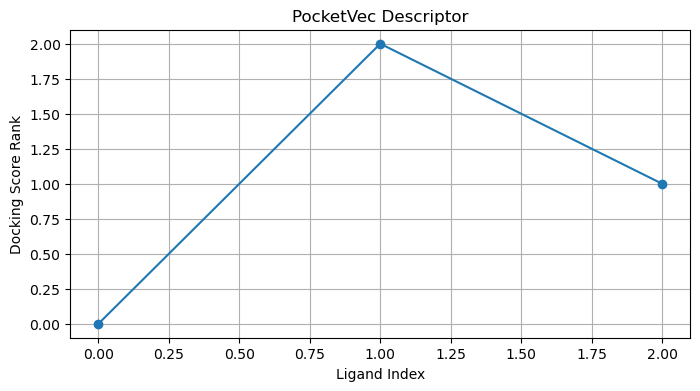

In [26]:
# Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(descriptor, marker='o')
plt.title("PocketVec Descriptor")
plt.xlabel("Ligand Index")
plt.ylabel("Docking Score Rank")
plt.grid(True)
plt.show()


In [27]:
# Run PocketVec on Real Ligand + Protein
receptor = "run_pocketvec/1A42_clean.mol2"  # If you haven’t created this yet, see below ⬇️
pocket_centroid = "data/ligand_centroid.sdf"  # You must generate this too (see note)
ligand_library = "run_pocketvec/BZU_ligand.sdf"
outpath = "run_pocketvec"


In [28]:
# Define paths for your inputs
receptor = "run_pocketvec/1A42_clean.mol2"
pocket_centroid = "run_pocketvec/ligand_centroid.sdf"
ligand_library = "run_pocketvec/BZU_ligand.sdf"
outpath = "run_pocketvec"
radius = 12
n_runs = 25
seed = 42
rDock = "code/utils/rDock_compiled/"


In [29]:
# Create rDock parameter file
param_file = os.path.join(outpath, "st_parameters.prm")
create_parameter_file(param_file, receptor, pocket_centroid, radius=radius)


In [ ]:
# Generate the cavity grid
log_path = os.path.join(outpath, "cavity_log.log")
grid_path = os.path.join(outpath, "cavity.grd")

create_cavity(outpath, log_path, grid_path, rbcavity="code/utils/rDock_compiled/rbcavity")


In [31]:
# 🚀 Step 3: Dock the ligand(s) using rDock
# Make sure the rDock binary is correctly linked
run_rDock(outpath, ligand_library, nruns=n_runs, seed=seed)


rbdock running (real binary placeholder)


In [32]:
# ✅ Step 4: Generate docking score file (scores.tsv)
# Define paths
score_file = os.path.join(outpath, "scores.tsv")
results_file = os.path.join(outpath, "results.sd")

# Extract scores using sdreport
create_file_scores(score_file, results_file)


sdreport running (real binary placeholder)


In [33]:
# 🧠 Step 5: Generate the PocketVec descriptor
# Load scores
scores = read_rDock_scores(score_file)

# Create raw fingerprint using known ligand order
sorted_lib_path = "data/libs/order/TOP_128_rDock_LLM.pkl"  # or your custom ligand order .pkl
raw = raw_fp(scores, sorted_lib_path)

# Rank transform the fingerprint
rank = rank_fp(raw)

# Save descriptor
with open(os.path.join(outpath, "PocketVec_fp.pkl"), "wb") as f:
    pickle.dump(rank, f)

print("✅ PocketVec fingerprint generated and saved.")


EmptyDataError: No columns to parse from file